In [21]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from collections import Counter

sb.set()

In [22]:
data = pd.read_csv("data/products.csv")

In [23]:
data.head()

,__v,_id,access,accommodates,address.country,address.location,address.street,amenities,bathrooms,bed_type,...,review_scores.review_scores_communication,review_scores.review_scores_location,review_scores.review_scores_rating,review_scores.review_scores_value,reviews,room_type,security_deposit,slug,summary,transit
0,0,62e31b260a55ab7c3bf5bad4,The entire condominium is occupied by the Air ...,4,United States,NaN,"Kihei, HI, United States","[""TV"",""Cable TV"",""Internet"",""Wifi"",""Air condit...",2.0,Real Bed,...,NaN,NaN,NaN,NaN,[],Entire home/apt,0.0,wailea-ekahi-48c-~-1-br-2-ba-garden-setting,***Room Rate includes the Hawaii State Tax of ...,Local buses travel around the island with conv...
1,0,62e31b260a55ab7c3bf5bf6e,"Refrigerator-freezer, electric heating, widesc...",4,Spain,NaN,"Barcelona, Spain","[""TV"",""Wifi"",""Air conditioning"",""Kitchen"",""Hea...",1.0,Real Bed,...,NaN,NaN,NaN,NaN,[],Private room,0.0,old-district-charming-apartment,Charming apartment located in the heart of the...,The nearest metro stations are Liceu (L3) and ...
2,0,62e31b260a55ab7c3bf5c2f2,O hóspede terá acesso a todas as áreas da casa...,3,Brazil,NaN,"Rio de Janeiro, Rio de Janeiro, Brazil","[""TV"",""Wifi"",""Kitchen"",""Smoking allowed"",""Elev...",1.0,Real Bed,...,NaN,NaN,NaN,NaN,[],Private room,0.0,sinta-se-em-casa-na-lapa-or-quarto-em-apartamento,"O apartamento fica localizado na Lapa, perto d...",O apartamento fica muito próximo a um ponto de...
3,0,62e31b260a55ab7c3bf5cd65,"Private bathroom, laundry, TV, fridge, kitchen...",1,Australia,NaN,"Redfern, NSW, Australia","[""TV"",""Wifi"",""Air conditioning"",""Pool"",""Free p...",1.0,Real Bed,...,NaN,NaN,NaN,NaN,[],Private room,888.0,fab-luxury-apartment-the-watertower,The Watertower apartment building was an old s...,"If you intend to use public transport (trains,..."
4,0,62e31b260a55ab7c3bf5d506,O Jornada Rio de Janeiro Hostel possui uma áre...,2,Brazil,NaN,"Rio de Janeiro, Rio de Janeiro, Brazil","[""Wifi"",""Air conditioning"",""Pool"",""Kitchen"",""S...",1.0,Real Bed,...,NaN,NaN,NaN,NaN,[],Private room,0.0,suite-classica,Quarto com 1 cama de casal com possibilidade d...,"Com a estação de trem ""Méier"" a poucos passos ..."


In [24]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   __v                                        149 non-null    int64  
 1   _id                                        149 non-null    object 
 2   access                                     149 non-null    object 
 3   accommodates                               149 non-null    int64  
 4   address.country                            149 non-null    object 
 5   address.location                           0 non-null      float64
 6   address.street                             149 non-null    object 
 7   amenities                                  149 non-null    object 
 8   bathrooms                                  149 non-null    float64
 9   bed_type                                   149 non-null    object 
 10  bedrooms                  

In [25]:
print("Data shape", data.shape)

Data shape (149, 44)


In [26]:
data['price']

0      320.0
1       50.0
2      101.0
3      100.0
4      179.0
       ...  
144    301.0
145     70.0
146    125.0
147    185.0
148     69.0
Name: price, Length: 149, dtype: float64

In [27]:
# get value from price dictionary (CODE FOR DATA.CSV file)
# from ast import literal_eval
#
# data['price'] = data.price.apply(lambda x: literal_eval(str(x)))
# data['price'] = data['price'].apply(lambda x: x['$numberDecimal'])

In [28]:
print(data.apply(lambda col: col.unique()))

__v                                                                                        [0]
_id                                          [62e31b260a55ab7c3bf5bad4, 62e31b260a55ab7c3bf...
access                                       [The entire condominium is occupied by the Air...
accommodates                                           [4, 3, 1, 2, 10, 8, 6, 9, 7, 5, 16, 11]
address.country                              [United States, Spain, Brazil, Australia, Port...
address.location                                                                         [nan]
address.street                               [Kihei, HI, United States, Barcelona, Spain, R...
amenities                                    [["TV","Cable TV","Internet","Wifi","Air condi...
bathrooms                                                       [2.0, 1.0, 3.0, 4.5, 1.5, 2.5]
bed_type                                                                     [Real Bed, Futon]
bedrooms                                          

In [29]:
property_data = data.groupby('property_type').count()
property_data.head()

,__v,_id,access,accommodates,address.country,address.location,address.street,amenities,bathrooms,bed_type,...,review_scores.review_scores_communication,review_scores.review_scores_location,review_scores.review_scores_rating,review_scores.review_scores_value,reviews,room_type,security_deposit,slug,summary,transit
property_type,,,,,,,,,,,,,,,,,,,,,
Aparthotel,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Apartment,90,90,90,90,90,0,90,90,90,90,...,87,87,87,87,90,90,90,89,90,90
Bed and breakfast,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Condominium,7,7,7,7,7,0,7,7,7,7,...,5,5,5,5,7,7,7,7,7,7
Cottage,2,2,2,2,2,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [30]:
print(data.nunique())

__v                                            1
_id                                          149
access                                       146
accommodates                                  12
address.country                                8
address.location                               0
address.street                                69
amenities                                    149
bathrooms                                      6
bed_type                                       2
bedrooms                                       5
beds                                          10
cancellation_policy                            5
cleaning_fee                                  55
description                                  149
host.host_about                              143
host.host_id                                 143
host.host_listings_count                      30
host.host_location                            58
host.host_name                               141
host.host_response_r

<AxesSubplot:title={'center':'Distribution of Property Types'}, ylabel='property_type'>

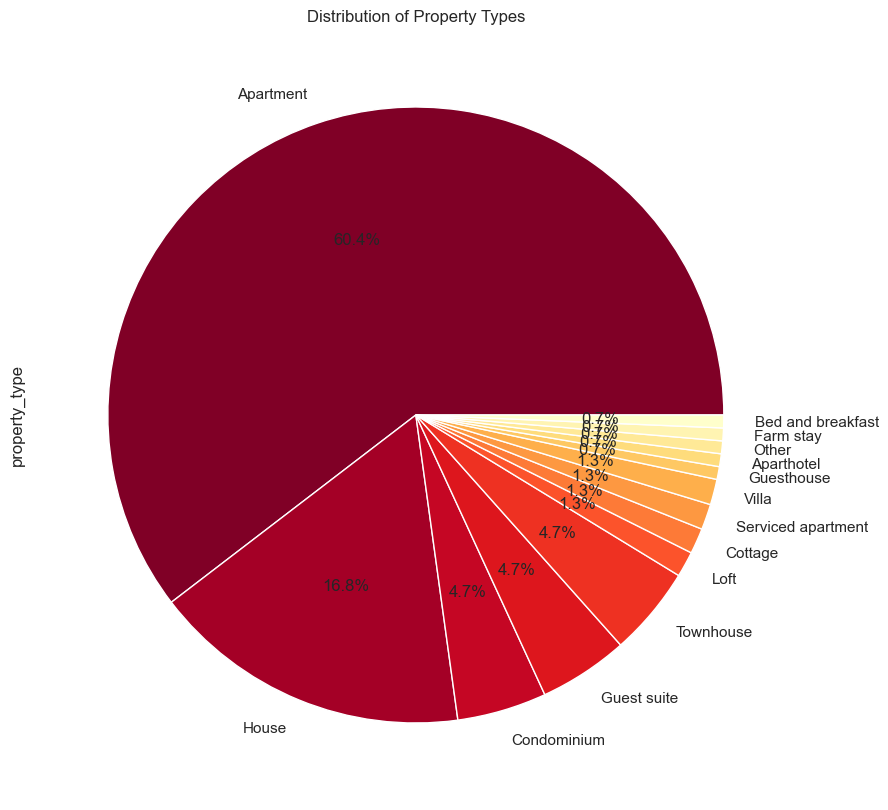

In [31]:
plt.figure(figsize=(10, 10))
plt.title("Distribution of Property Types")
data["property_type"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', colormap="YlOrRd_r")

<AxesSubplot:title={'center':'Distribution of Room Types'}, ylabel='room_type'>

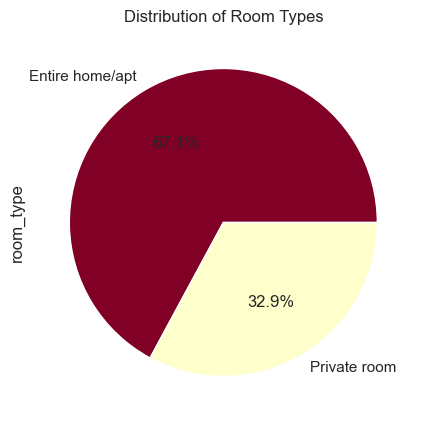

In [32]:
# Room Types

plt.figure(figsize=(5, 5))
plt.title("Distribution of Room Types")
data["room_type"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', colormap="YlOrRd_r")

Text(0, 0.5, '')

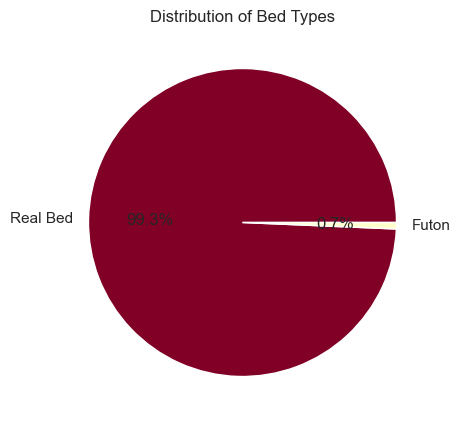

In [33]:
# There are bed Types

plt.figure(figsize=(5, 5))
plt.title("Distribution of Bed Types")
data["bed_type"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', colormap="YlOrRd_r")
plt.ylabel('')

Text(0, 0.5, '')

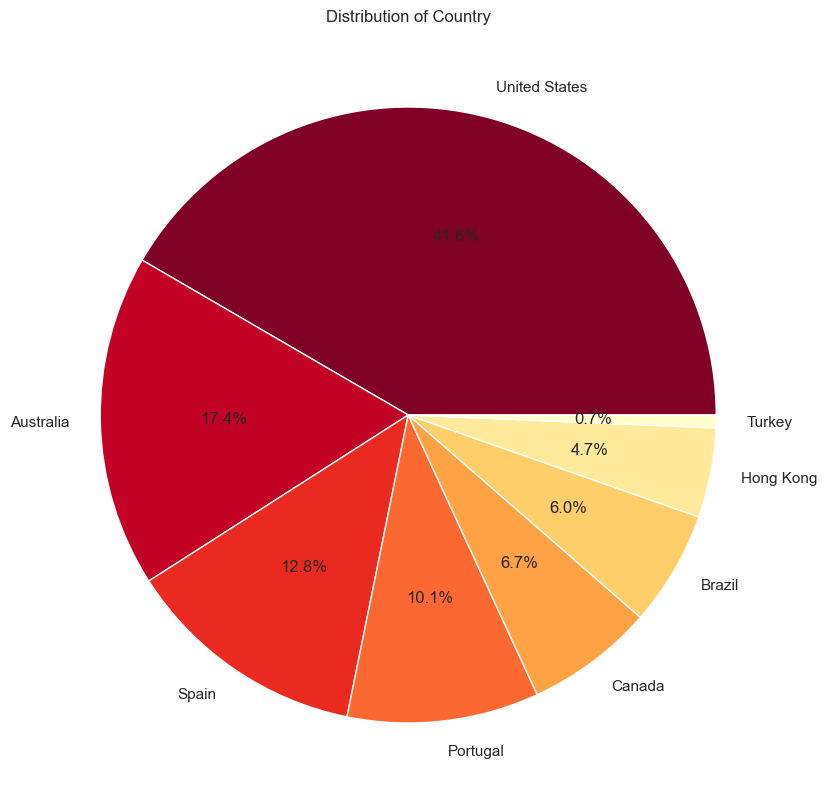

In [34]:
# Distribution of Country

plt.figure(figsize=(10, 10))
plt.title("Distribution of Country")
data["address.country"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', colormap="YlOrRd_r")
plt.ylabel('')

Text(0, 0.5, '')

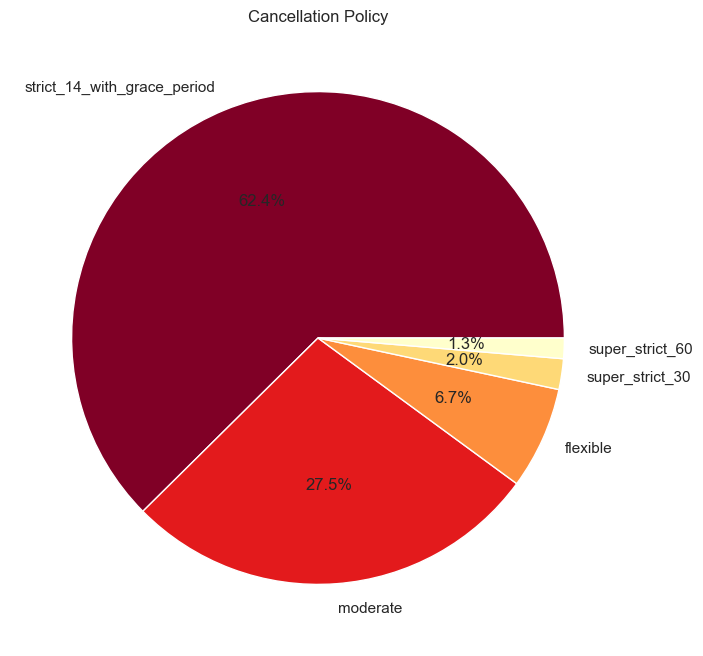

In [35]:
# Cancellation Policy

plt.figure(figsize=(8, 8))
plt.title("Cancellation Policy")
data["cancellation_policy"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', colormap="YlOrRd_r")
plt.ylabel('')

<AxesSubplot:xlabel='room_type', ylabel='property_type'>

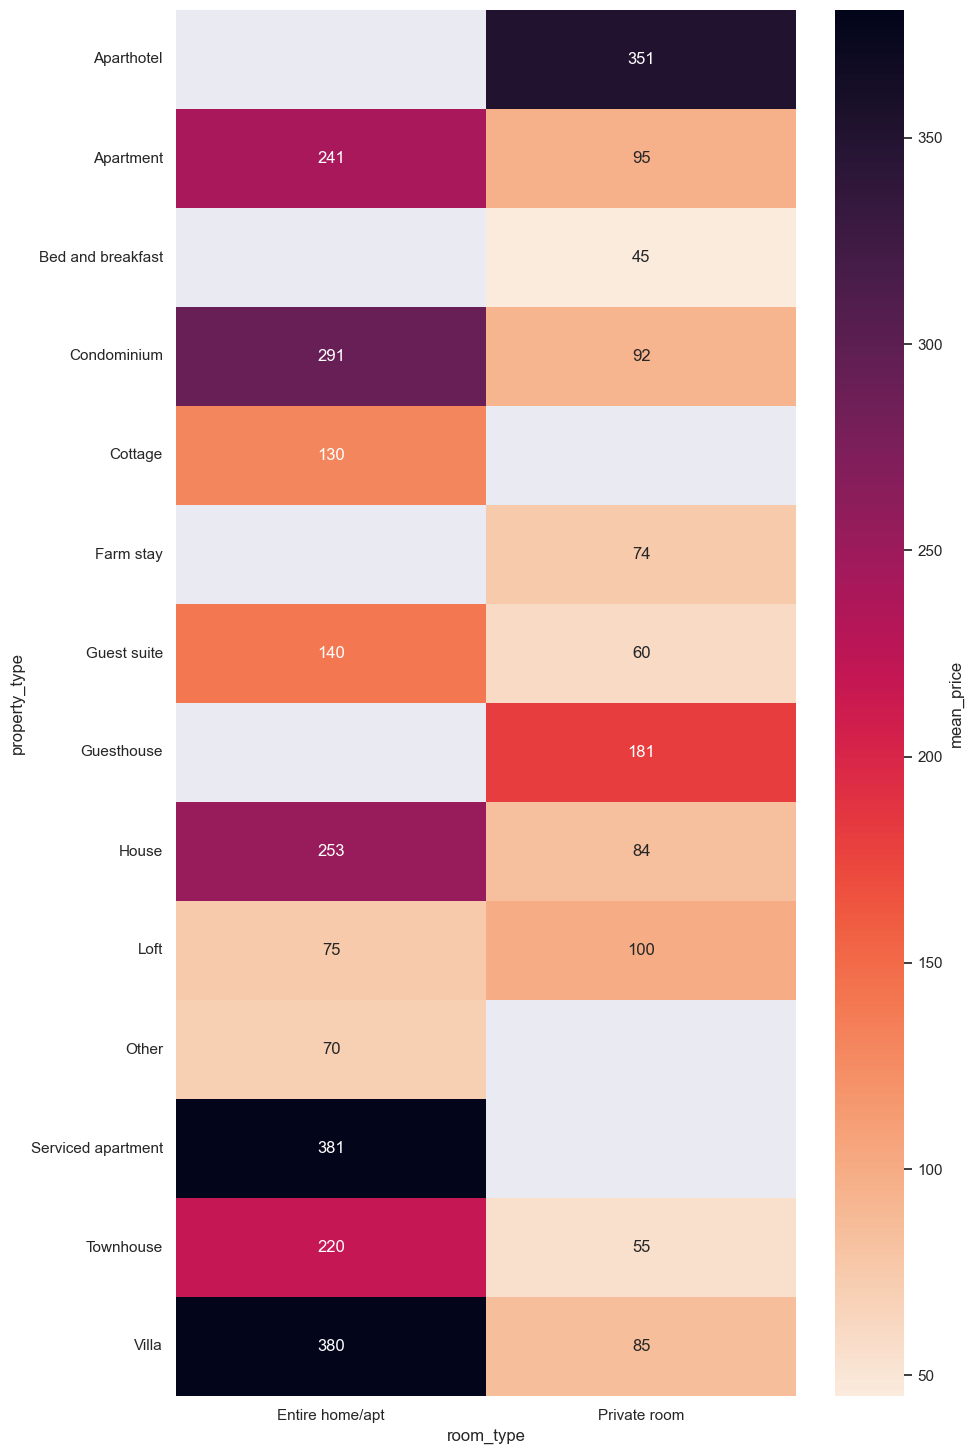

In [36]:
plt.figure(figsize = (10,18))
sb.heatmap(data.groupby(['property_type', 'room_type']).price.mean().unstack(), annot=True, fmt=".0f", cmap = sb.cm.rocket_r, cbar_kws={'label': 'mean_price'})